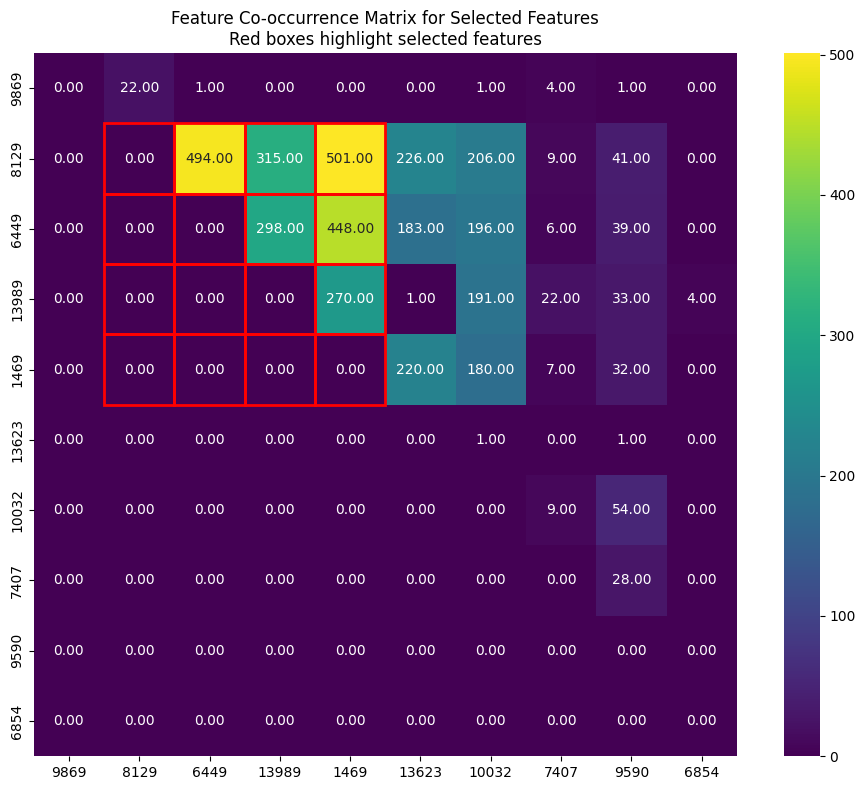

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define the indices of interest
indices = [9869, 8129, 6449, 13989, 1469, 13623, 10032, 7407, 9590, 6854]

# Define indices to highlight
highlight_indices = [1469, 6449, 8129, 13989]
# Get positions of highlighted indices in our matrix
highlight_positions = [indices.index(idx) for idx in highlight_indices]

# Load the NPZ file
data = np.load(
    "../results/gemma-2-2b/gemma-scope-2b-pt-res-canonical/layer_0_width_16k_canonical/n_batches_100/feature_acts_cooc_total_threshold_1_5.npz"
)
matrix = data["arr_0"]

# Extract the submatrix
submatrix = matrix[indices][:, indices]

# set diagonal to zero and put upper triangular
np.fill_diagonal(submatrix, 0)
submatrix = np.triu(submatrix)

# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    submatrix,
    cmap="viridis",
    xticklabels=indices,
    yticklabels=indices,
    annot=True,
    fmt=".2f",
    square=True,
)

# Add rectangles around highlighted cells
for i in highlight_positions:
    for j in highlight_positions:
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor="red", lw=2))

plt.title(
    "Feature Co-occurrence Matrix for Selected Features\nRed boxes highlight selected features"
)
plt.tight_layout()
plt.show()